In [1]:
# Importing Essential Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step-1 : Data Loading

In [2]:
df = pd.read_csv("matches.csv")
deliveries = pd.read_csv('deliveries.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Step-2 : Data cleanning

In [4]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
df[df['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


### For all the cities having NULL values, VENUE is Dubai International Cricket Stadium, so we will fill city as DUBAI

In [6]:
df.city.fillna('Dubai',inplace = True)

In [7]:
df[df['winner'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


### There are total of 3 records in which we don't have any winner. May be the match would have been washed out due to Rain. So, let's fill up those values as -> Match Abandoned

In [8]:
df.winner.fillna('Match Abandoned',inplace=True)
df.player_of_match.fillna('Match Abandoned',inplace=True)
df.umpire1.fillna('Anonymous',inplace=True)
df.umpire2.fillna('Anonymous',inplace=True)
df.drop(columns='umpire3',inplace=True)

In [9]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [10]:
df.shape

(636, 17)

### Now, as we know Franchise of Pune IPL team changed their name from Rising Pune Supergiants to Rising Pune Supergiant(removed s from Supergiants) in Season 2017. So, we will consider both the teams as 1 team only

In [11]:
df['winner'][df['winner']== 'Rsing Pune Supergiants'] ='Rsing Pune Supergiant'
df['team1'][df['team1'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
df['team2'][df['team2'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
df['toss_winner'][df['toss_winner'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'

C:\Users\KC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [12]:
df.tail(8)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
628,629,2016,Visakhapatnam,21-05-2016,Kings XI Punjab,Rising Pune Supergiant,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon
629,630,2016,Kanpur,21-05-2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan
630,631,2016,Kolkata,22-05-2016,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan
635,636,2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford


#### Data has been cleaned now. Let's move forward..

# Step-3 : Exploratory Data Analysis

In [13]:
ipl = df[['id', 'season']].merge(deliveries, left_on = 'id', right_on ='match_id').drop('match_id', axis = 1)


In [14]:
ipl.head()

,id,season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
ipl.total_runs.value_counts()

1    62205
0    53305
4    17250
2    10253
6     6486
3      597
5      326
7       38
Name: total_runs, dtype: int64

* 1) How many matches the teams have won in each season?
* 2) Plot the total number of matches won in all IPL

In [16]:
df.groupby('season').winner.value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 86, dtype: int64

In [17]:
teams = pd.Series(df['team1'].unique())

In [18]:
teams

0             Sunrisers Hyderabad
1                  Mumbai Indians
2                   Gujarat Lions
3          Rising Pune Supergiant
4     Royal Challengers Bangalore
5           Kolkata Knight Riders
6                Delhi Daredevils
7                 Kings XI Punjab
8             Chennai Super Kings
9                Rajasthan Royals
10                Deccan Chargers
11           Kochi Tuskers Kerala
12                  Pune Warriors
dtype: object

In [19]:
years = pd.Series(df['season'].unique())
years=years.sort_values()

### Now, let's create a DATAFRAME that will show which team has PLAYED how many matches in a particular Season


In [20]:
total_matches_played = {}

for team in teams:
    matches_per_year = []
    for year in years :
        total_match_per_year = df[((df['team1']==team) | (df['team2']==team)) & (df['season']==year)].shape[0]
        matches_per_year.append(total_match_per_year)
    total_matches_played[team] = matches_per_year
matches_played_by_team=pd.DataFrame(total_matches_played,index=years)

In [21]:
matches_played_by_team

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors
2008,0,14,0,0,14,13,14,15,16,16,14,0,0
2009,0,13,0,0,16,13,15,14,14,13,16,0,0
2010,0,16,0,0,16,14,14,14,16,14,16,0,0
2011,0,16,0,0,16,15,14,14,16,13,14,14,14
2012,0,17,0,0,15,17,18,16,18,16,15,0,16
2013,17,19,0,0,16,16,16,16,18,18,0,0,16
2014,14,15,0,0,14,16,14,17,16,14,0,0,0
2015,14,16,0,0,16,13,14,14,17,14,0,0,0
2016,17,14,16,14,16,15,14,14,0,0,0,0,0
2017,14,17,14,16,13,16,14,14,0,0,0,0,0


## Creating a DATAFRAME that will show which team has WON how many matches in a particular Season

In [22]:
dict_win_num = {}

for team in teams:
    matches_won = []
    for year in years:
        matches_won_per_year = df[(df['winner']==team) & (df['season']==year)].shape[0]
        matches_won.append(matches_won_per_year)
    dict_win_num[team] = matches_won
matches_won_by_team = pd.DataFrame(dict_win_num,index=years)

In [23]:
matches_won_by_team

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors
2008,0,7,0,0,4,6,7,10,9,13,2,0,0
2009,0,5,0,0,9,3,10,7,8,6,9,0,0
2010,0,11,0,0,8,7,7,4,9,6,8,0,0
2011,0,10,0,0,10,8,4,7,11,6,6,6,4
2012,0,10,0,0,8,12,11,8,10,7,4,0,4
2013,10,13,0,0,9,6,3,8,12,11,0,0,4
2014,6,7,0,0,5,11,2,12,10,7,0,0,0
2015,7,10,0,0,8,7,5,3,10,7,0,0,0
2016,11,7,9,0,9,8,7,4,0,0,0,0,0
2017,8,12,4,10,3,9,6,7,0,0,0,0,0


## Creating a DATAFRAME that will show WIN PERCENTAGE of teams in each Seaso

In [24]:
match_won_percnt = (matches_won_by_team/matches_played_by_team)*100
match_won_percnt.fillna(0,inplace=True)

In [25]:
match_won_percnt

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors
2008,0.000000,50.000000,0.000000,0.0,28.571429,46.153846,50.000000,66.666667,56.250000,81.250000,14.285714,0.000000,0.000000
2009,0.000000,38.461538,0.000000,0.0,56.250000,23.076923,66.666667,50.000000,57.142857,46.153846,56.250000,0.000000,0.000000
2010,0.000000,68.750000,0.000000,0.0,50.000000,50.000000,50.000000,28.571429,56.250000,42.857143,50.000000,0.000000,0.000000
2011,0.000000,62.500000,0.000000,0.0,62.500000,53.333333,28.571429,50.000000,68.750000,46.153846,42.857143,42.857143,28.571429
2012,0.000000,58.823529,0.000000,0.0,53.333333,70.588235,61.111111,50.000000,55.555556,43.750000,26.666667,0.000000,25.000000
2013,58.823529,68.421053,0.000000,0.0,56.250000,37.500000,18.750000,50.000000,66.666667,61.111111,0.000000,0.000000,25.000000
2014,42.857143,46.666667,0.000000,0.0,35.714286,68.750000,14.285714,70.588235,62.500000,50.000000,0.000000,0.000000,0.000000
2015,50.000000,62.500000,0.000000,0.0,50.000000,53.846154,35.714286,21.428571,58.823529,50.000000,0.000000,0.000000,0.000000
2016,64.705882,50.000000,56.250000,0.0,56.250000,53.333333,50.000000,28.571429,0.000000,0.000000,0.000000,0.000000,0.000000
2017,57.142857,70.588235,28.571429,62.5,23.076923,56.250000,42.857143,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
match_won_percnt['Year'] = match_won_percnt.index

## Now, let's create a DATAFRAME that will show number of times TEAMS PLAYED AGAINST EACH OTHER

In [27]:
dict_oppnt_matches = {}

for team_1 in teams:
    matches_against_oppnt = []
    for team_2 in teams:
        match_plyd_against_this_oppnt = df[((df['team1']==team_1) & (df['team2']==team_2)) | ((df['team1']==team_2) & (df['team2']==team_1))].shape[0]
        matches_against_oppnt.append(match_plyd_against_this_oppnt)
    dict_oppnt_matches[team_1] = matches_against_oppnt

total_match_agnst_oppnt = pd.DataFrame(dict_oppnt_matches,index=teams)

In [28]:
total_match_agnst_oppnt

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors
Sunrisers Hyderabad,0,10,5,4,10,12,10,10,6,7,0,0,2
Mumbai Indians,10,0,4,6,21,21,20,20,22,16,10,1,6
Gujarat Lions,5,4,0,4,5,4,4,4,0,0,0,0,0
Rising Pune Supergiant,4,6,4,0,4,4,4,4,0,0,0,0,0
Royal Challengers Bangalore,10,21,5,4,0,20,19,20,19,16,11,2,5
Kolkata Knight Riders,12,21,4,4,20,0,19,21,16,15,9,2,5
Delhi Daredevils,10,20,4,4,19,19,0,20,16,16,11,2,6
Kings XI Punjab,10,20,4,4,20,21,20,0,17,15,10,1,6
Chennai Super Kings,6,22,0,0,19,16,16,17,0,17,10,2,6
Rajasthan Royals,7,16,0,0,16,15,16,15,17,0,9,2,5


## Creating a DATAFRAME that will show number of times TEAMS WON AGAINST EACH OTHER

In [29]:
dict_oppnt_matches_won = {}

for team_1 in teams:
    matches_won_against_oppnt = []
    for team_2 in teams:
        match_won_against_this_oppnt = df[(((df['team1']==team_1) & (df['team2']==team_2)) | ((df['team1']==team_2) & (df['team2']==team_1))) & (df['winner']==team_1)].shape[0]
        matches_won_against_oppnt.append(match_won_against_this_oppnt)
    dict_oppnt_matches_won[team_1] = matches_won_against_oppnt
    
total_match_won_agnst_oppnt = pd.DataFrame(dict_oppnt_matches_won,index=teams)

In [30]:
total_match_won_agnst_oppnt

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors
Sunrisers Hyderabad,0,5,0,2,4,8,4,2,4,4,0,0,0
Mumbai Indians,5,0,2,3,8,5,9,10,10,6,4,1,1
Gujarat Lions,5,2,0,1,3,1,3,2,0,0,0,0,0
Rising Pune Supergiant,1,2,3,0,2,3,2,2,0,0,0,0,0
Royal Challengers Bangalore,6,13,2,2,0,11,6,12,12,7,6,0,0
Kolkata Knight Riders,4,16,3,1,9,0,7,7,10,9,2,2,1
Delhi Daredevils,6,11,1,0,12,12,0,11,11,10,4,1,2
Kings XI Punjab,8,10,2,1,8,14,9,0,10,9,3,0,3
Chennai Super Kings,2,12,0,0,7,6,5,7,0,6,4,1,2
Rajasthan Royals,3,10,0,0,8,6,6,6,11,0,2,1,1


## Creating a DATAFRAME that will show WIN PERCENTAGE of TEAMS WON AGAINST EACH OTHER

In [31]:
oppnt_won_percnt = (total_match_won_agnst_oppnt/total_match_agnst_oppnt)*100
oppnt_won_percnt.fillna(0,inplace=True)

In [32]:
oppnt_won_percnt

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors
Sunrisers Hyderabad,0.000000,50.000000,0.0,50.0,40.000000,66.666667,40.000000,20.000000,66.666667,57.142857,0.000000,0.0,0.000000
Mumbai Indians,50.000000,0.000000,50.0,50.0,38.095238,23.809524,45.000000,50.000000,45.454545,37.500000,40.000000,100.0,16.666667
Gujarat Lions,100.000000,50.000000,0.0,25.0,60.000000,25.000000,75.000000,50.000000,0.000000,0.000000,0.000000,0.0,0.000000
Rising Pune Supergiant,25.000000,33.333333,75.0,0.0,50.000000,75.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.0,0.000000
Royal Challengers Bangalore,60.000000,61.904762,40.0,50.0,0.000000,55.000000,31.578947,60.000000,63.157895,43.750000,54.545455,0.0,0.000000
Kolkata Knight Riders,33.333333,76.190476,75.0,25.0,45.000000,0.000000,36.842105,33.333333,62.500000,60.000000,22.222222,100.0,20.000000
Delhi Daredevils,60.000000,55.000000,25.0,0.0,63.157895,63.157895,0.000000,55.000000,68.750000,62.500000,36.363636,50.0,33.333333
Kings XI Punjab,80.000000,50.000000,50.0,25.0,40.000000,66.666667,45.000000,0.000000,58.823529,60.000000,30.000000,0.0,50.000000
Chennai Super Kings,33.333333,54.545455,0.0,0.0,36.842105,37.500000,31.250000,41.176471,0.000000,35.294118,40.000000,50.0,33.333333
Rajasthan Royals,42.857143,62.500000,0.0,0.0,50.000000,40.000000,37.500000,40.000000,64.705882,0.000000,22.222222,50.0,20.000000


In [33]:
teams_dict = {'Sunrisers Hyderabad' : 'SRH',
'Mumbai Indians' : 'MI',
'Gujarat Lions' : 'GL',
'Rising Pune Supergiant' : 'RPS',
'Royal Challengers Bangalore' : 'RCB',
'Kolkata Knight Riders' : 'KKR',
'Delhi Daredevils' : 'DD',
'Kings XI Punjab' : 'KXIP',
'Chennai Super Kings' : 'CSK',
'Rajasthan Royals' : 'RR',
'Deccan Chargers' : 'DC',
'Kochi Tuskers Kerala' : 'KTK',
'Pune Warriors' : 'PW'}

In [34]:
oppnt_won_percnt['Teams'] = oppnt_won_percnt.index.map(teams_dict)

In [35]:
oppnt_won_percnt

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Teams
Sunrisers Hyderabad,0.000000,50.000000,0.0,50.0,40.000000,66.666667,40.000000,20.000000,66.666667,57.142857,0.000000,0.0,0.000000,SRH
Mumbai Indians,50.000000,0.000000,50.0,50.0,38.095238,23.809524,45.000000,50.000000,45.454545,37.500000,40.000000,100.0,16.666667,MI
Gujarat Lions,100.000000,50.000000,0.0,25.0,60.000000,25.000000,75.000000,50.000000,0.000000,0.000000,0.000000,0.0,0.000000,GL
Rising Pune Supergiant,25.000000,33.333333,75.0,0.0,50.000000,75.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.0,0.000000,RPS
Royal Challengers Bangalore,60.000000,61.904762,40.0,50.0,0.000000,55.000000,31.578947,60.000000,63.157895,43.750000,54.545455,0.0,0.000000,RCB
Kolkata Knight Riders,33.333333,76.190476,75.0,25.0,45.000000,0.000000,36.842105,33.333333,62.500000,60.000000,22.222222,100.0,20.000000,KKR
Delhi Daredevils,60.000000,55.000000,25.0,0.0,63.157895,63.157895,0.000000,55.000000,68.750000,62.500000,36.363636,50.0,33.333333,DD
Kings XI Punjab,80.000000,50.000000,50.0,25.0,40.000000,66.666667,45.000000,0.000000,58.823529,60.000000,30.000000,0.0,50.000000,KXIP
Chennai Super Kings,33.333333,54.545455,0.0,0.0,36.842105,37.500000,31.250000,41.176471,0.000000,35.294118,40.000000,50.0,33.333333,CSK
Rajasthan Royals,42.857143,62.500000,0.0,0.0,50.000000,40.000000,37.500000,40.000000,64.705882,0.000000,22.222222,50.0,20.000000,RR


# Step-4 : Data Visualisation

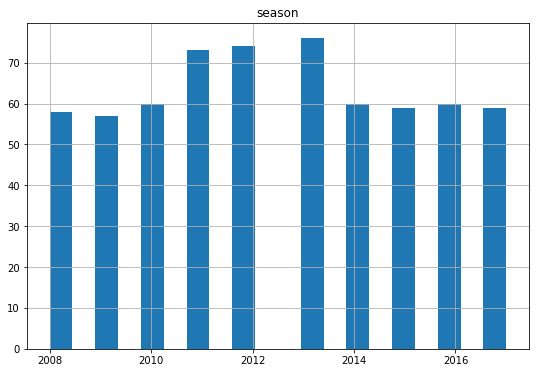

In [36]:
df.hist(column='season', figsize=(9,6),bins=20)  
plt.show()

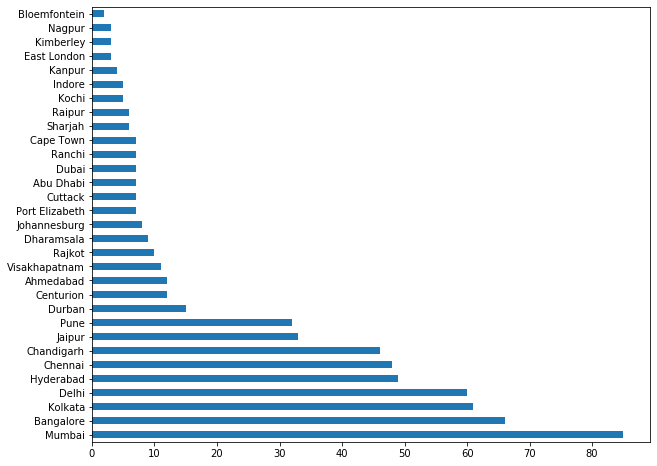

In [37]:
df['city'].value_counts().plot(kind='barh', figsize=(10,8), rot=0)
plt.show()

## MUMBAI INDIANS

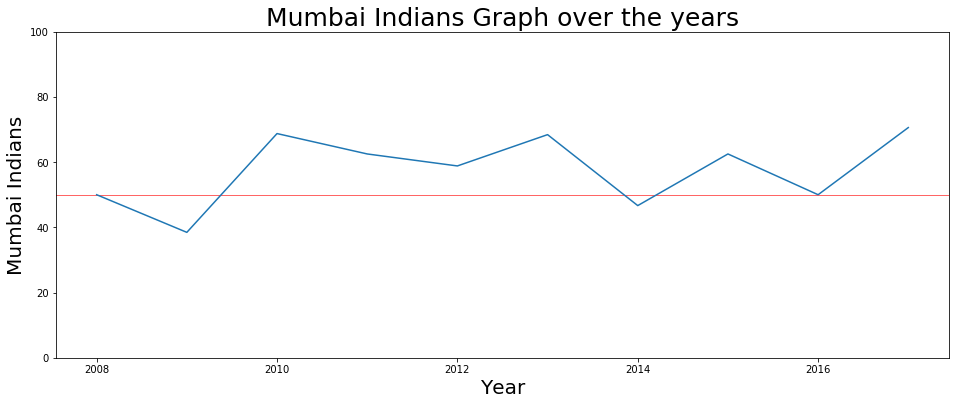

In [38]:
plt.figure(figsize=(16,6))
plt.title('Mumbai Indians Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Mumbai Indians',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Mumbai Indians',
    data=match_won_percnt)
plt.show()

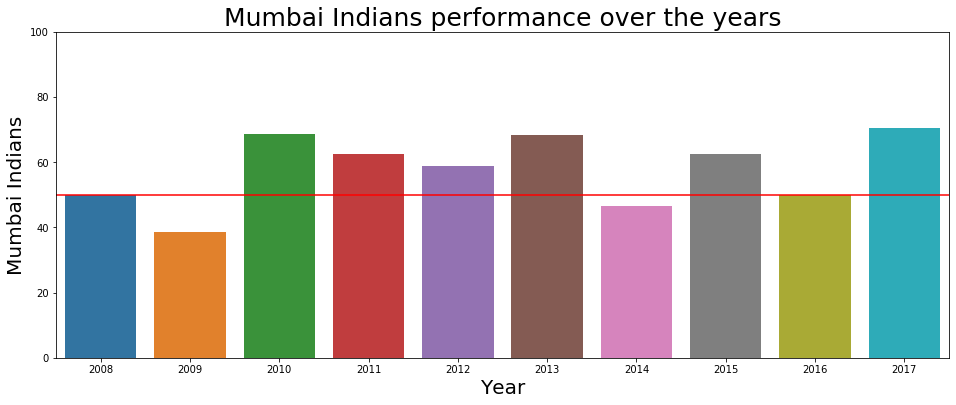

In [39]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Mumbai Indians performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Mumbai Indians',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Mumbai Indians')
plt.show()

### Observations :
* The 2 worst Seasons went for MUMBAI INDIANS were - 2009 and 2014
* Overall, Mumbai Indians had an amazing IPL journey so far with their most successful seasons as - 2017, 2013 and 2010


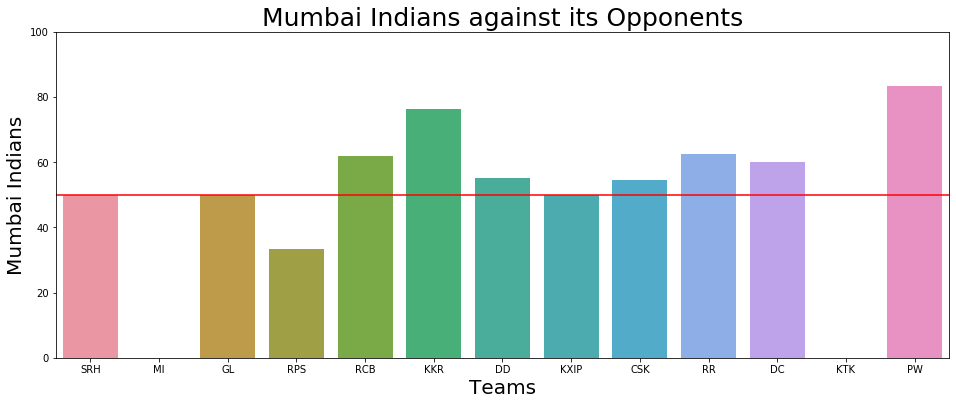

In [40]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Mumbai Indians against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Mumbai Indians',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Mumbai Indians')
plt.show()

### Observations :
* As seen from the above visualisation, Mumbai Indians has been a Strong Competitor for almost all the teams except RISING PUNE SUPERGIANT against whom they have struggled a bit.
* The 2 teams against whom Mumbai Indians have an exceptional record are - KOLKATA KNIGHT RIDERS and PUNE WARRIORS

## Gujrat Lions

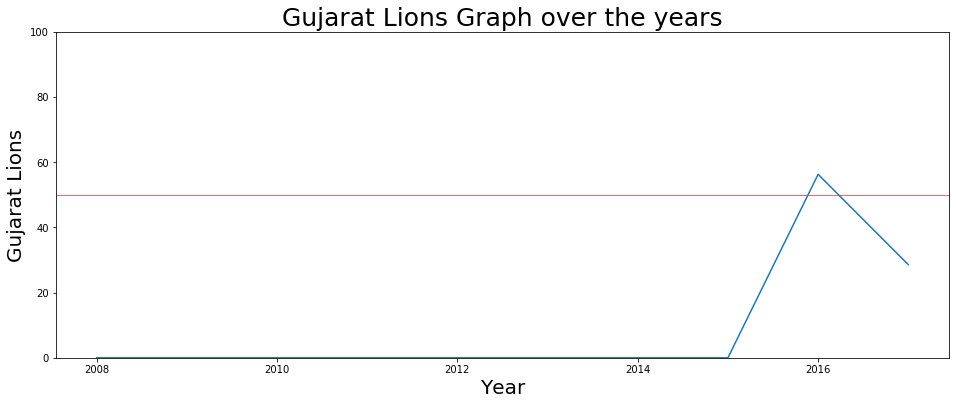

In [41]:
plt.figure(figsize=(16,6))
plt.title('Gujarat Lions Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Gujarat Lions',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Gujarat Lions',
    data=match_won_percnt)
plt.show()

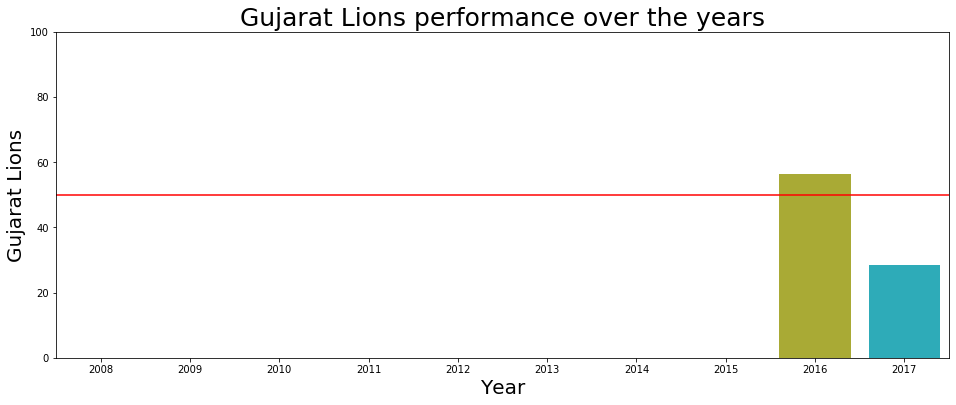

In [42]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Gujarat Lions performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Gujarat Lions',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Gujarat Lions')
plt.show()

### Observations :The  worst Seasons went for Gujrat Lions were - 2017 in Compassion to 2016

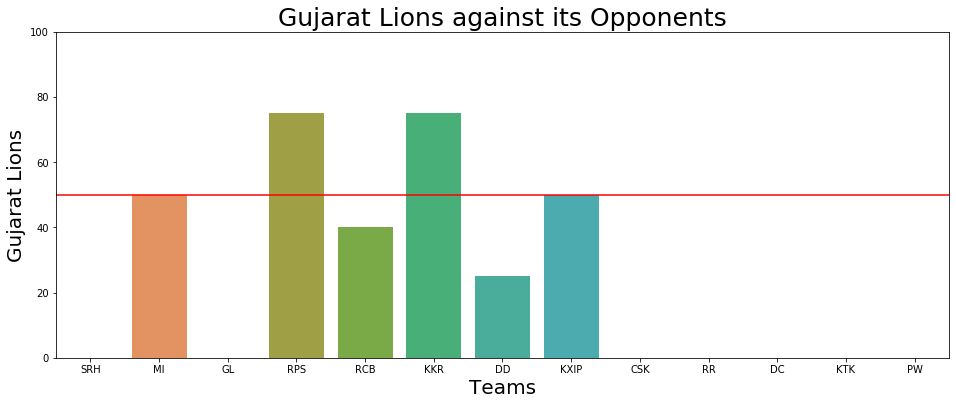

In [43]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Gujarat Lions against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Gujarat Lions',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Gujarat Lions')
plt.show()

### Observations : ### Observations :
* As seen from the above visualisation, Gujrat Lions has been a Strong Competitor for almost all the teams except Delhi Daredevils and ROYAL CHALLENGERS BANGALORE against whom they have struggled a bit.
* The 2 teams against whom Mumbai Indians have an exceptional record are - KOLKATA KNIGHT RIDERS and RISING PUNE SUPERGIANT


## Deccan Chargers 

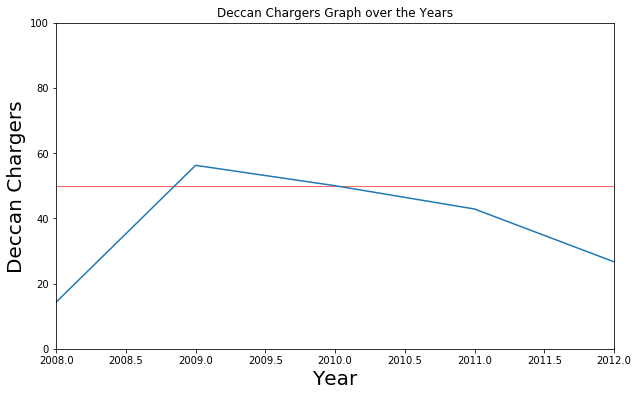

In [44]:
plt.figure(figsize=(10,6))
plt.title('Deccan Chargers Graph over the Years')
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Deccan Chargers ',fontsize =20)

plt.ylim(0,100)
plt.xlim(2008,2012)
plt.axhline(y=50,color='red',linewidth='0.6')

sns.lineplot(
    x='Year',
    y='Deccan Chargers',
    data=match_won_percnt)
plt.show()

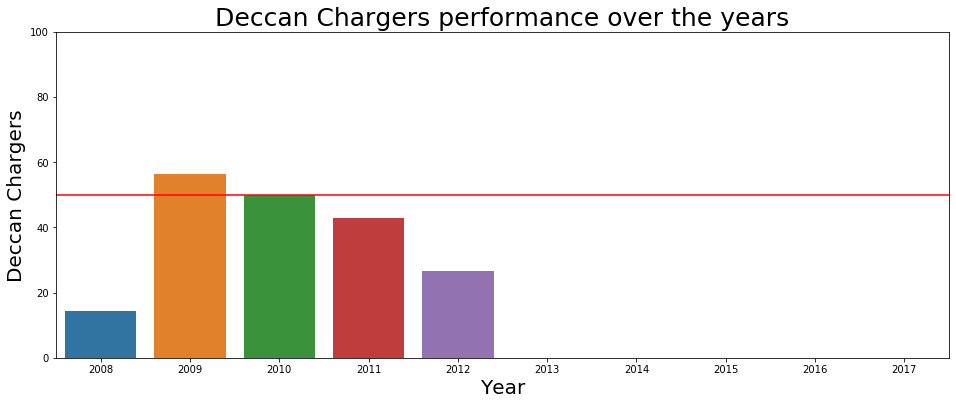

In [45]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Deccan Chargers performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Deccan Chargers',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Deccan Chargers')
plt.show()

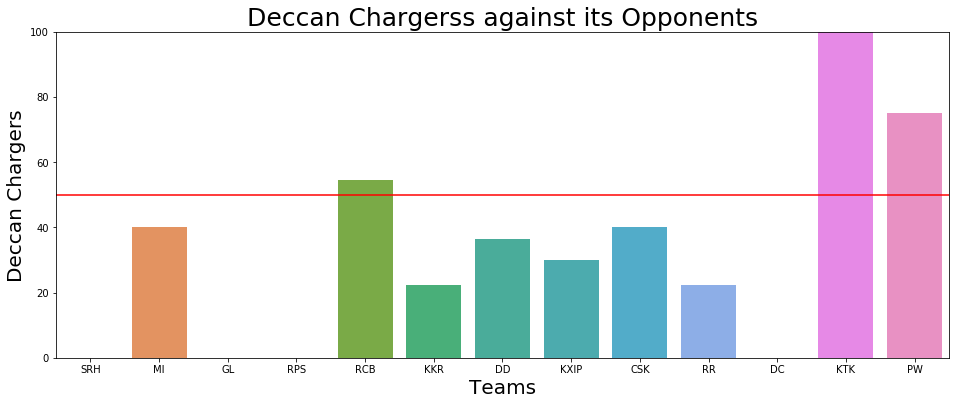

In [46]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Deccan Chargerss against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Deccan Chargers',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Deccan Chargers')
plt.show()

### Observations :
* Deccan Chargers played first 5 seasons of the IPL and after that the owner sold this Hyderabad Franchise. Later, the new owner of this Hyderabad Franchise changed its name to Sunrisers Hyderabad.
* As we can see from graph, the only Best Season for the Deccan Chargers was 2009. This year the whole IPL Tournament was played in South Africa and they WON IPL Trophy this year under the leadership of Adam Gilchrist.
* The performance of Deccan Chargers kept on digging after 2009 which forced their owner to sell this franchise after season 2012.

## Rising Pune Supergiant

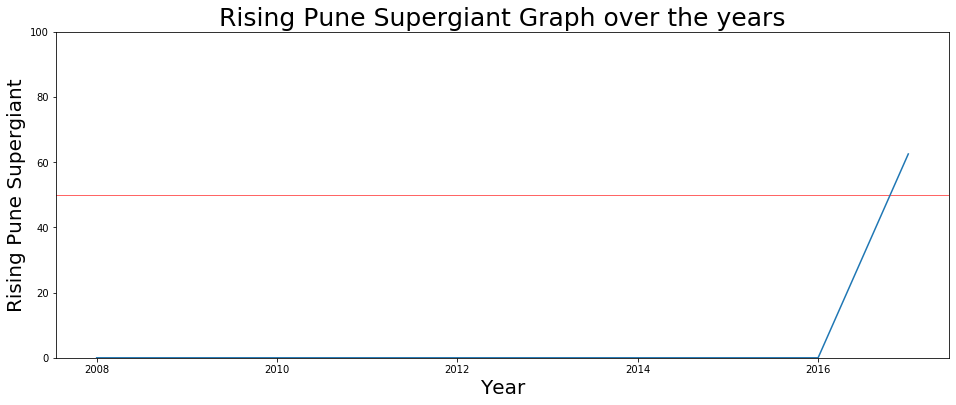

In [47]:
plt.figure(figsize=(16,6))
plt.title('Rising Pune Supergiant Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Rising Pune Supergiant',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Rising Pune Supergiant',
    data=match_won_percnt)
plt.show()

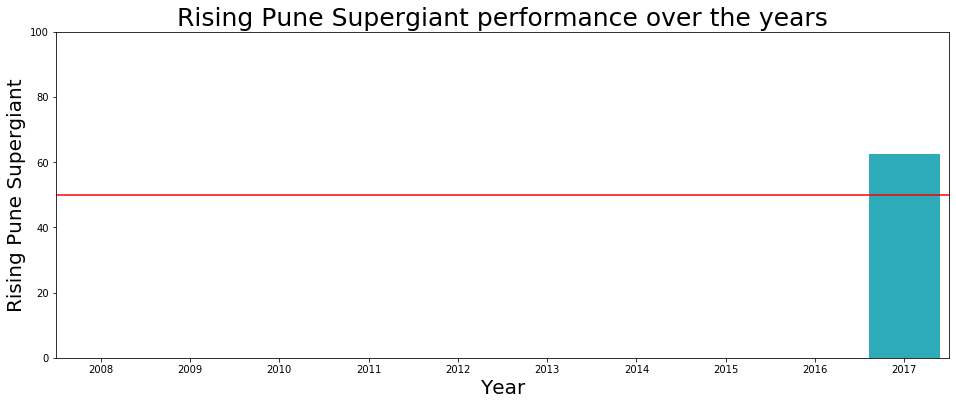

In [48]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Rising Pune Supergiant performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Rising Pune Supergiant',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Rising Pune Supergiant')
plt.show()

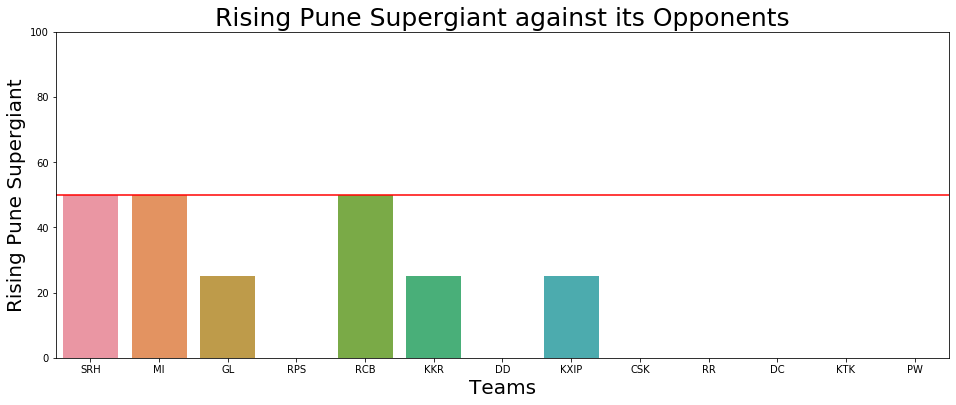

In [49]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Rising Pune Supergiant against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Rising Pune Supergiant',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Rising Pune Supergiant')
plt.show()

## Royal Challengers Bangalore

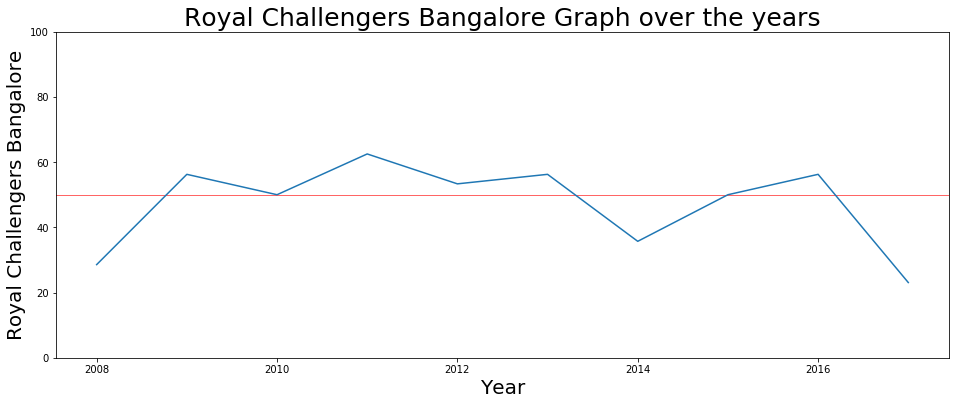

In [50]:
plt.figure(figsize=(16,6))
plt.title('Royal Challengers Bangalore Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Royal Challengers Bangalore',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Royal Challengers Bangalore',
    data=match_won_percnt)
plt.show()

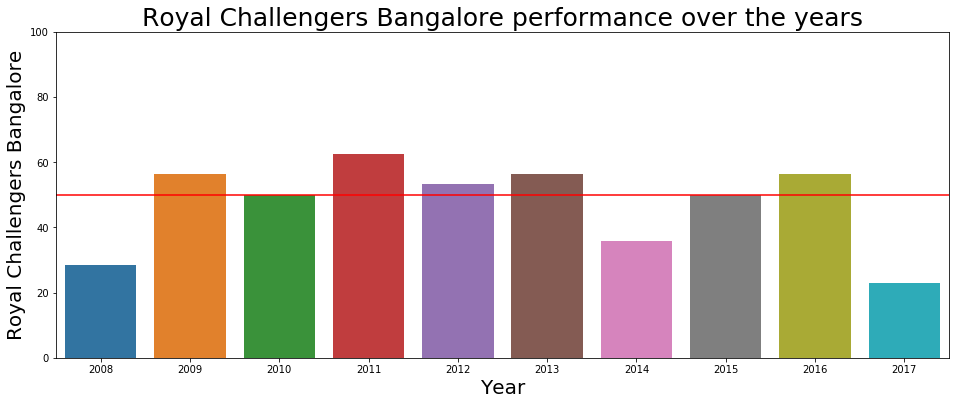

In [51]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Royal Challengers Bangalore performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Royal Challengers Bangalore',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Royal Challengers Bangalore')
plt.show()

### Observations :
* From the graph, we can clearly see that Royal Challengers Bangalore didn't had a smooth journey so far
* The most successful season of RCB so far is - 2011
* The worst seasons for RCB were - 2008,2014 and 2017

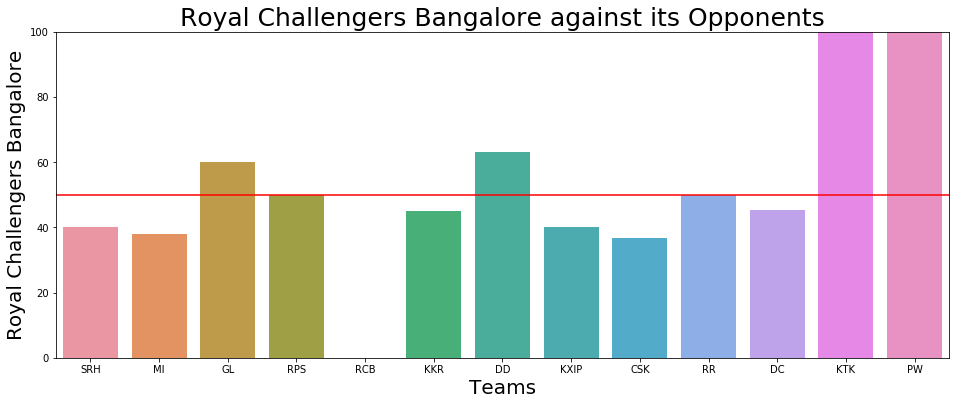

In [52]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Royal Challengers Bangalore against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Royal Challengers Bangalore',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Royal Challengers Bangalore')
plt.show()

### Observations :
* Royal Challengers Bangalore have 100% win rate against - KOCHI TUSKERS KERALA and PUNE WARRIORS.
* RCB is also having good record against - GUJARAT LIONS and DELHI DAREDEVILS.
* RCB have worst records against - CHENNAI SUPER KINGS and MUMBAI INDIANS


## KOLKATA KNIGHT RIDERS

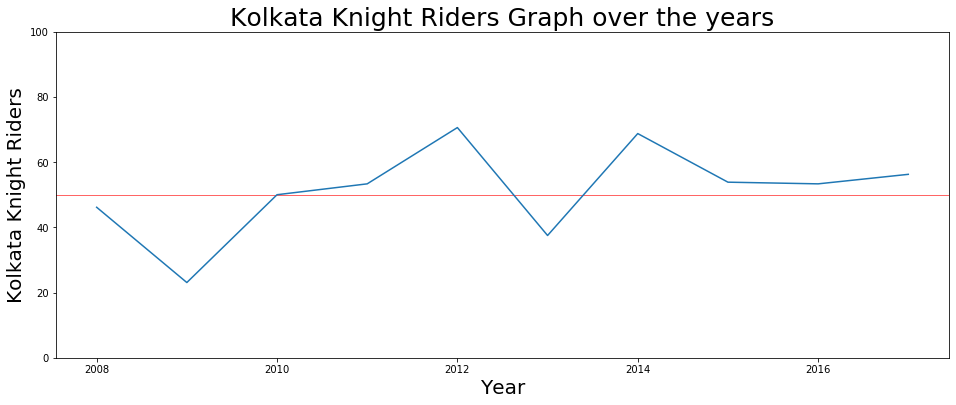

In [53]:
plt.figure(figsize=(16,6))
plt.title('Kolkata Knight Riders Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kolkata Knight Riders',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Kolkata Knight Riders',
    data=match_won_percnt)
plt.show()

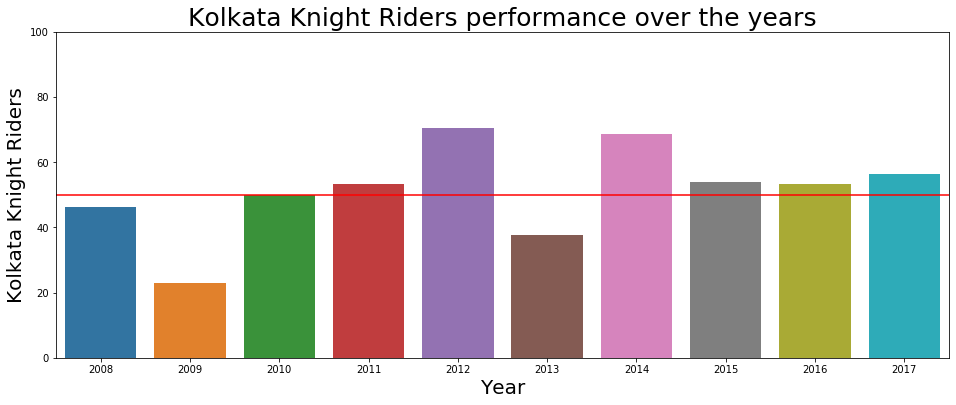

In [54]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Kolkata Knight Riders performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kolkata Knight Riders',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Kolkata Knight Riders')
plt.show()

### Observations :
* The 2 Great Seasons for Kolkata Knight Riders were - 2012 and 2014.
* The 3 Worst Seasons for Kolkata Knight Riders were - 2009, 2013 and 2008.

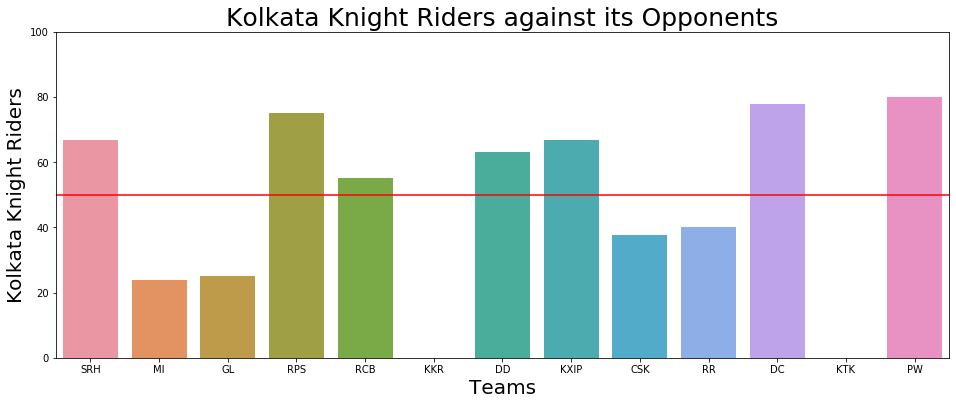

In [55]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Kolkata Knight Riders against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kolkata Knight Riders',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Kolkata Knight Riders')
plt.show()

### Observations :
* Kolkata Knight Riders have a Good Record among all the teams except these 4 against whom they have a very Poor Record - MUMBAI INDIANS, GUJARAT LIONS, CHENNAI SUPER KINGS and RAJASTHAN ROYALS.

## Delhi Daredevils

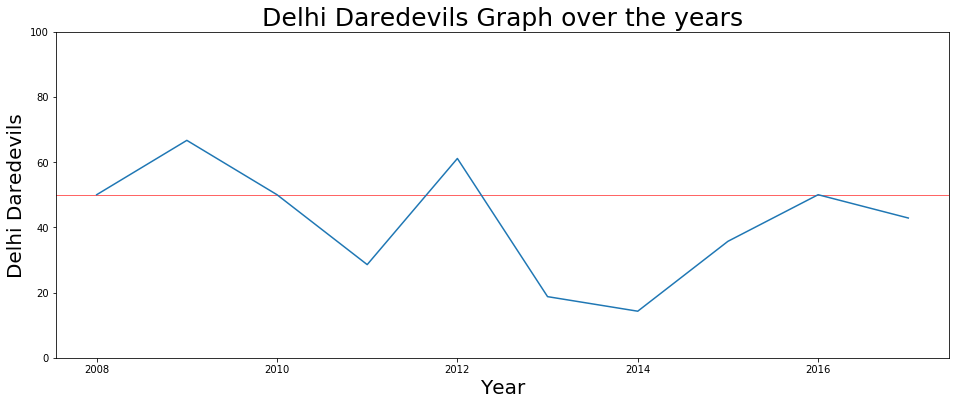

In [56]:
plt.figure(figsize=(16,6))
plt.title('Delhi Daredevils Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Delhi Daredevils',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Delhi Daredevils',
    data=match_won_percnt)
plt.show()

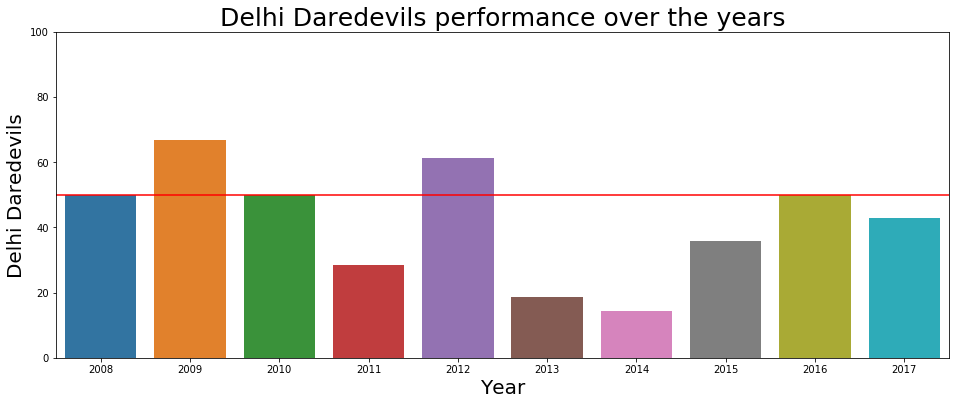

In [57]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Delhi Daredevils performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Delhi Daredevils',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Delhi Daredevils')
plt.show()

### Observations :
* Delhi Daredevils had a disappointed season so far.
* The 2 only successful Seasons for Delhi Daredevils were - 2009 and 2012.
* The 3 worst Seasons for Delhi Daredevils were - 2014, 2013 and 2011.

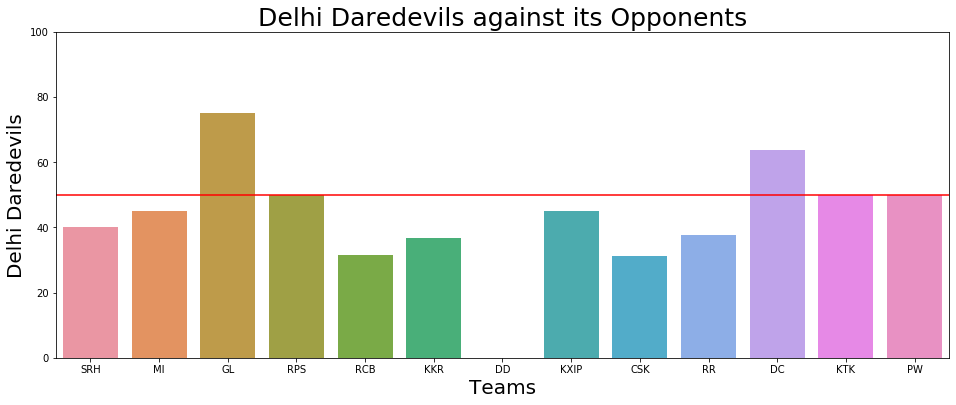

In [58]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Delhi Daredevils against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Delhi Daredevils',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Delhi Daredevils')
plt.show()

### Observations :
* Delhi Daredevils had a Poor Record among all the teams except 2.
* Delhi Daredevils had a Good Record only against - GUJARAT LIONS and DECCAN CHARGERS.

## Kings XI Punjab

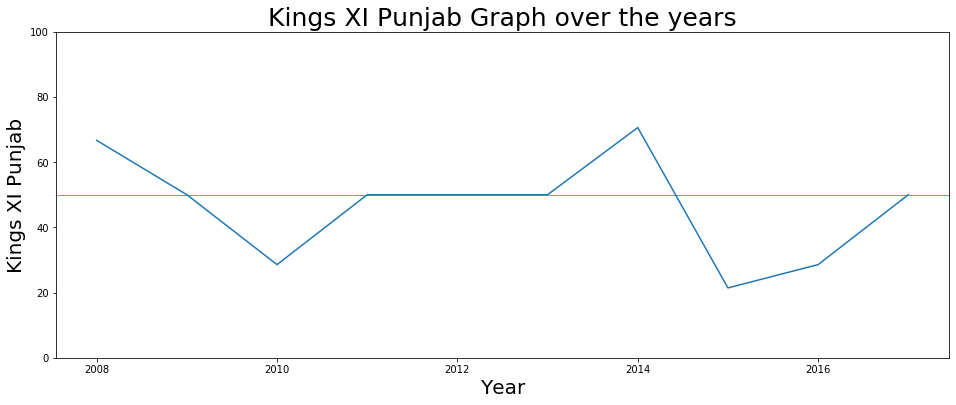

In [59]:
plt.figure(figsize=(16,6))
plt.title('Kings XI Punjab Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kings XI Punjab',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Kings XI Punjab',
    data=match_won_percnt)
plt.show()

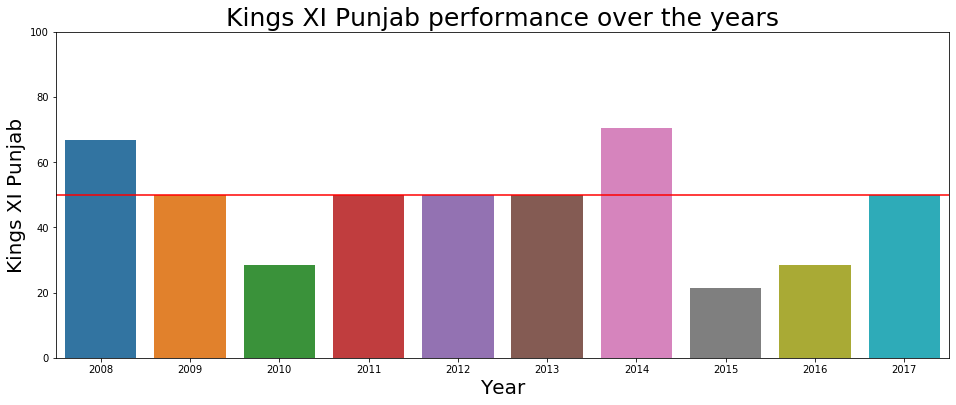

In [60]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Kings XI Punjab performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kings XI Punjab ',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Kings XI Punjab')
plt.show()

### Observations :
* The Best Seasons for KXIP were - 2008 and 2014.
* The Worst Seasons for KXIP were - 2010, 2015 and 2016.

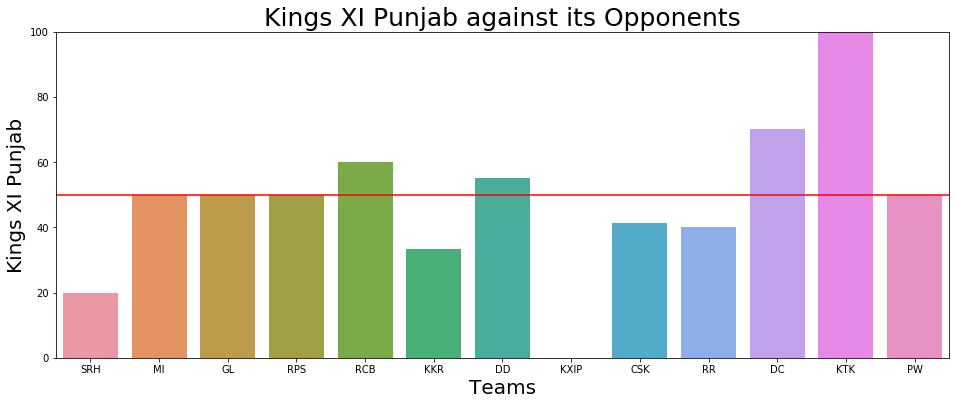

In [61]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Kings XI Punjab against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kings XI Punjab ',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Kings XI Punjab')
plt.show()

### Observations :
* Kings XI Punjab has never lost to KOCHI TUSKERS KERALA.
* Kings XI Punjab is having Great Record against teams - DECCAN CHARGERS, ROYAL CHALLANGERS BANGALORE and DELHI DAREDEVILS.
* Kings XI Punjab is having Worst Record against teams - SUNRISERS HYDERABAD, KOLKATA KNIGHT RIDERS, RAJASTHAN ROYALS and CHENNAI SUPER KINGS.

## Chennai Super Kings

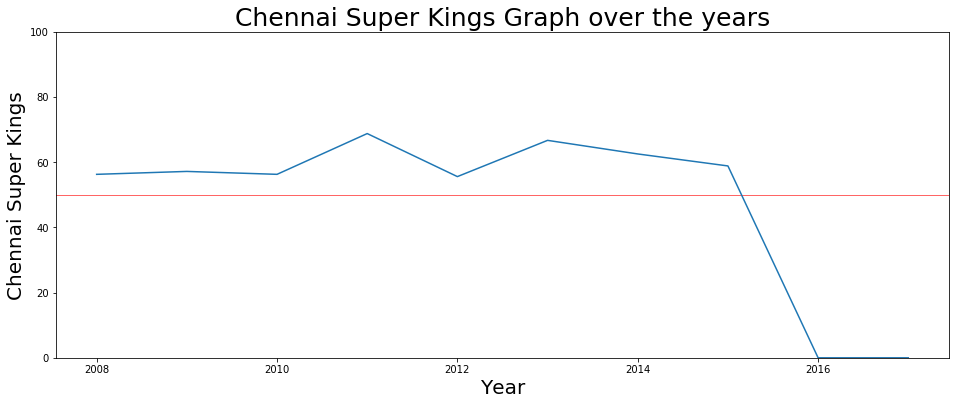

In [62]:
plt.figure(figsize=(16,6))
plt.title('Chennai Super Kings Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Chennai Super Kings',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Chennai Super Kings',
    data=match_won_percnt)
plt.show()

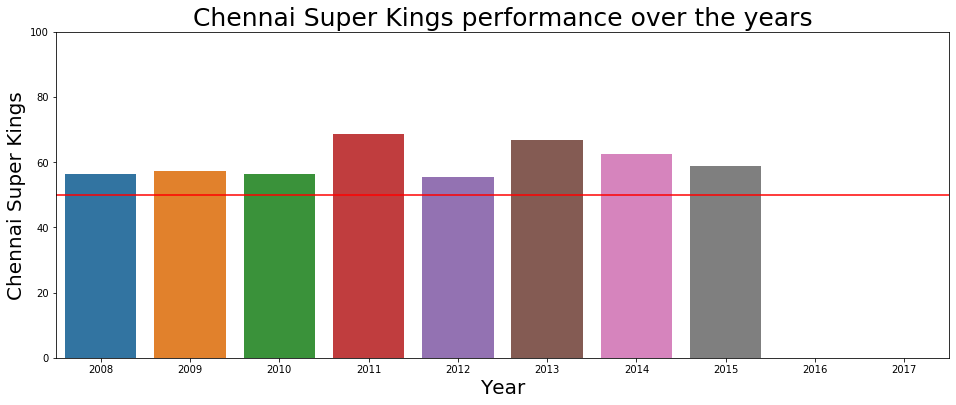

In [63]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Chennai Super Kings performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Chennai Super Kings',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Chennai Super Kings')
plt.show()

### Observations :
* Above Graph clearly indicates that Chennai Super Kings had a most successful IPL journey so far as compared to other teams.
* Chennai Super Kings was BANNED for 2 years due to allegations of Betting and Match Fixing,that is why no data is there for seasons - 2016 and 2017.
* Most successful seasons of CSK were - 2011,2013 and 2014.
* CSK didn't had any bad season so far.

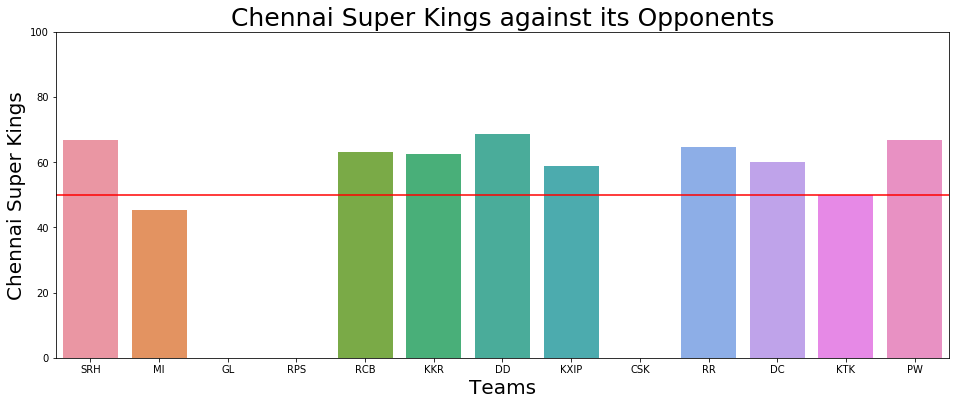

In [64]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Chennai Super Kings against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Chennai Super Kings',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Chennai Super Kings')
plt.show()

### Observations :
* Chennai Super Kings is having an exceptional record against all the teams.
* The only team against whom they have struggled a bit is MUMBAI INDIANS

## Rajasthan Royals

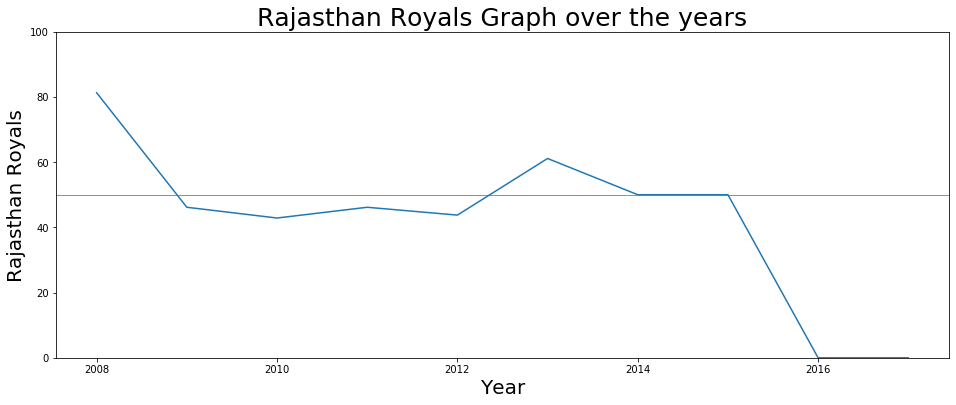

In [65]:
plt.figure(figsize=(16,6))
plt.title('Rajasthan Royals Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Rajasthan Royals',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Rajasthan Royals',
    data=match_won_percnt)
plt.show()

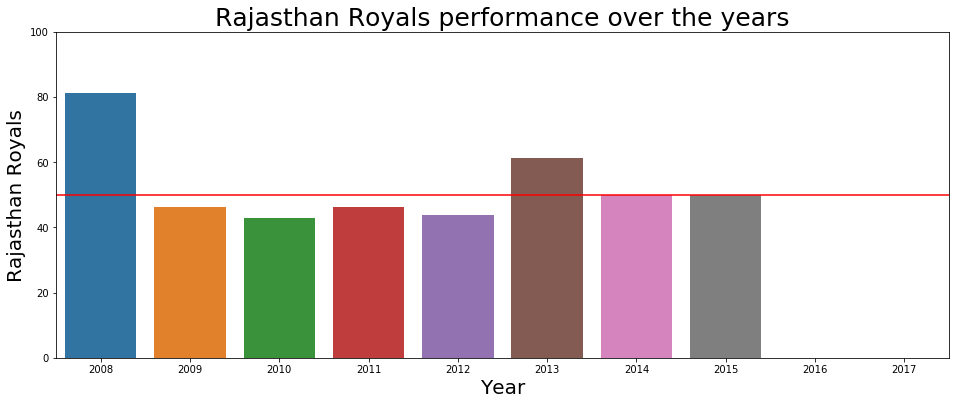

In [66]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Rajasthan Royals performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Rajasthan Royals',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Rajasthan Royals')
plt.show()

### Observations :
* Rajasthan Royals doesn't had a smooth IPL journey so far.
* Rajasthan Royals along with Chennai Super Kings was also BANNED for 2 years due to allegations of Betting and Match Fixing,that is why no data is there for seasons - 2016 and 2017.
* Rajasthan Royals had an Exceptional Season in 2008(They won IPL Trophy as well).
* Except 2008, their journey has been below par only. The another good season for them was - 2013.

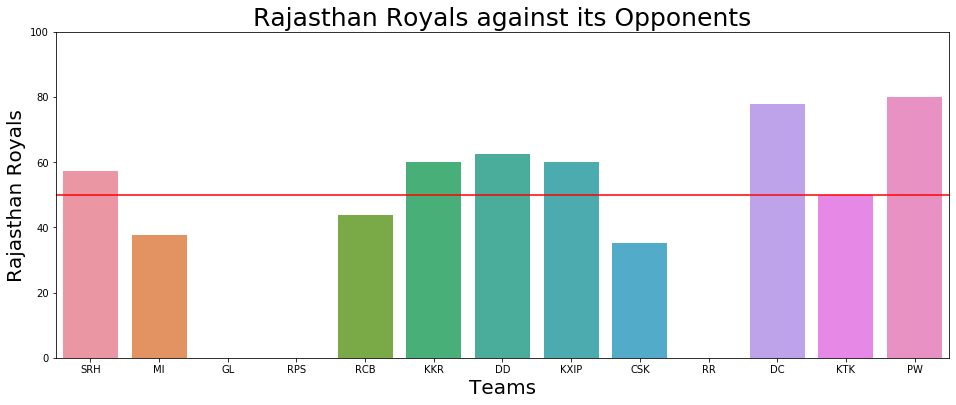

In [67]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Rajasthan Royals against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Rajasthan Royals',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Rajasthan Royals')
plt.show()

### Observations :
* Rajasthan Royals had a Great Record against - PUNE WARRIORS and DECCAN CHARGERS.
* Rajasthan Royals have also performed well against teams - DELHI DAREDEVILS, KOLKATA KNIGHT RIDERS, KINGS XI PUNJAB and SUNRISERS HYDERABAD.
* The teams against whom they have struggled a lot are - MUMBAI INDIANS, CHENNAI SUPER KINGS and ROYAL CHALLENGERS BANGALORE.


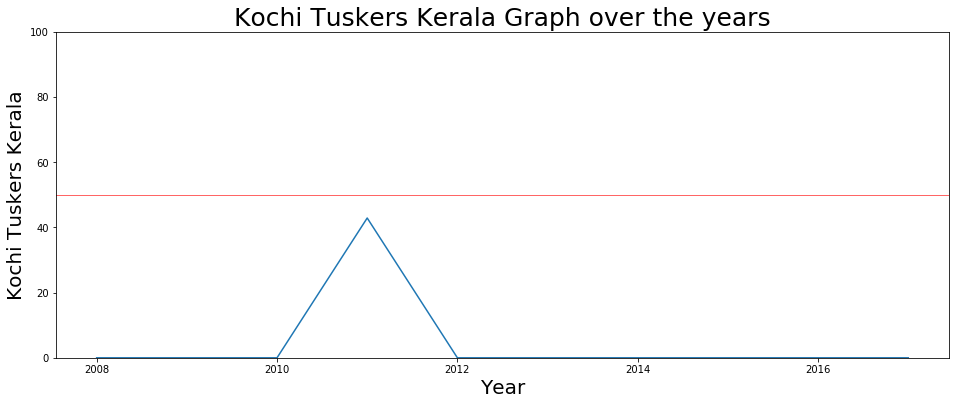

In [68]:
plt.figure(figsize=(16,6))
plt.title('Kochi Tuskers Kerala Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kochi Tuskers Kerala',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Kochi Tuskers Kerala',
    data=match_won_percnt)
plt.show()

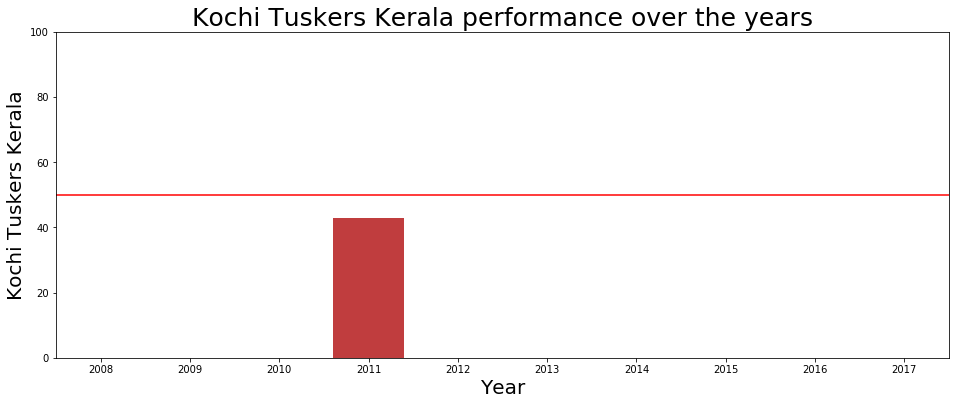

In [69]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Kochi Tuskers Kerala performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kochi Tuskers Kerala',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Kochi Tuskers Kerala')
plt.show()

### Observations :
* Kochi Tuskers Kerala  played only 4 seasons of the IPL 
* As we can see from graph, in the only Season the Kochi Tuskers Kerala didnt qualified

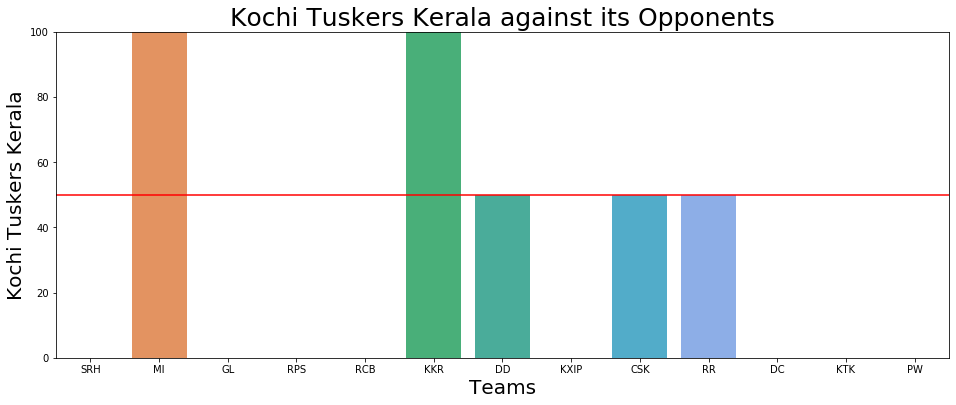

In [70]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Kochi Tuskers Kerala against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Kochi Tuskers Kerala',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Kochi Tuskers Kerala')
plt.show()

### Observations :
* Kochi Tuskers Kerala  played very good against MI,KKR 

## Pune Warriors

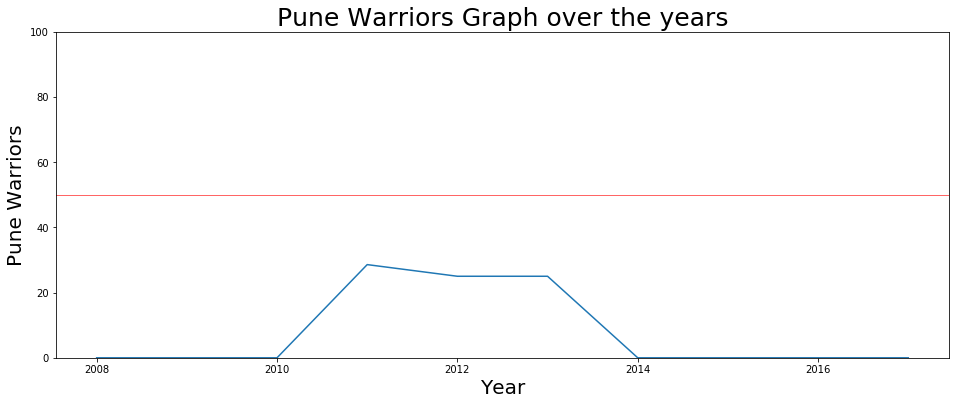

In [71]:
plt.figure(figsize=(16,6))
plt.title('Pune Warriors Graph over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Pune Warriors',fontsize =20)
plt.ylim(0,100)
plt.axhline(y=50,color='red',linewidth='0.6')
sns.lineplot(
    x='Year',
    y='Pune Warriors',
    data=match_won_percnt)
plt.show()

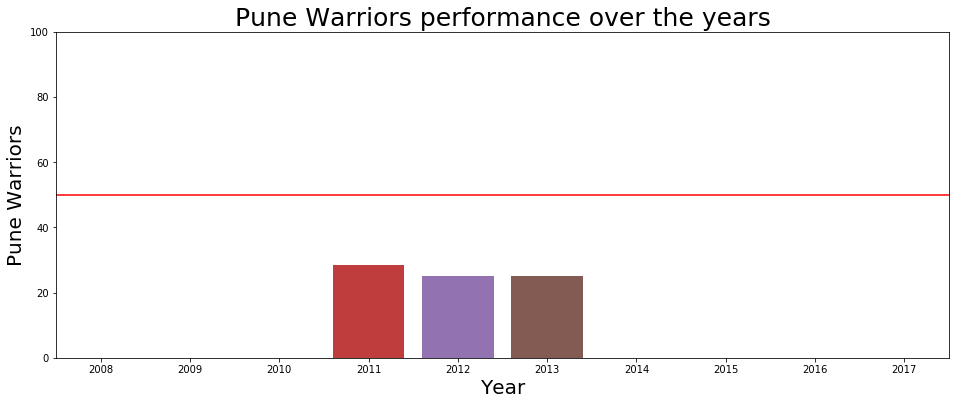

In [72]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Pune Warriors performance over the years',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Pune Warriors',fontsize =20)
sns.barplot(data=match_won_percnt,x='Year',y='Pune Warriors')
plt.show()

### Observations :
* Pune Warriors played 3 seasons of the IPL 
* As we can see from graph, all the season are not very good for the team


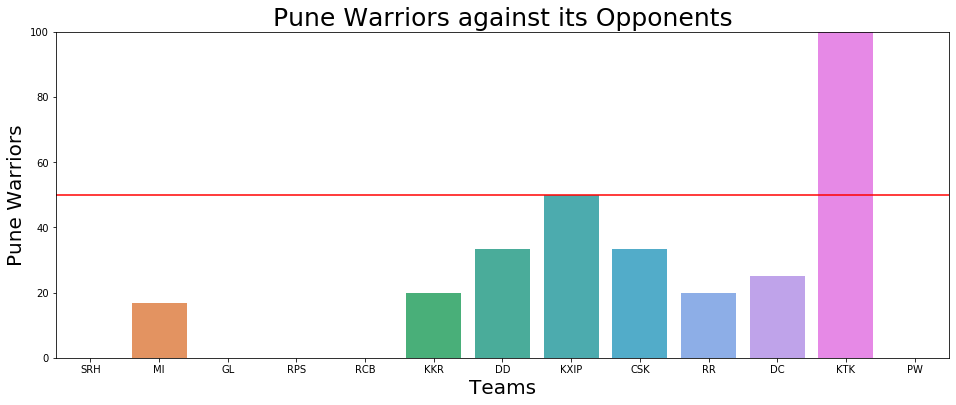

In [73]:
plt.figure(figsize=(16,6))
plt.ylim(0,100)
plt.axhline(y=50,color='red')
plt.title('Pune Warriors against its Opponents',fontsize =25)
plt.xlabel("YEARS",fontsize =20)
plt.ylabel('Pune Warriors',fontsize =20)
sns.barplot(data=oppnt_won_percnt,x='Teams',y='Pune Warriors')
plt.show()

### Observations :
* As we can see from graph, the team is very good againts KTK only
* Other team where dominat over pw


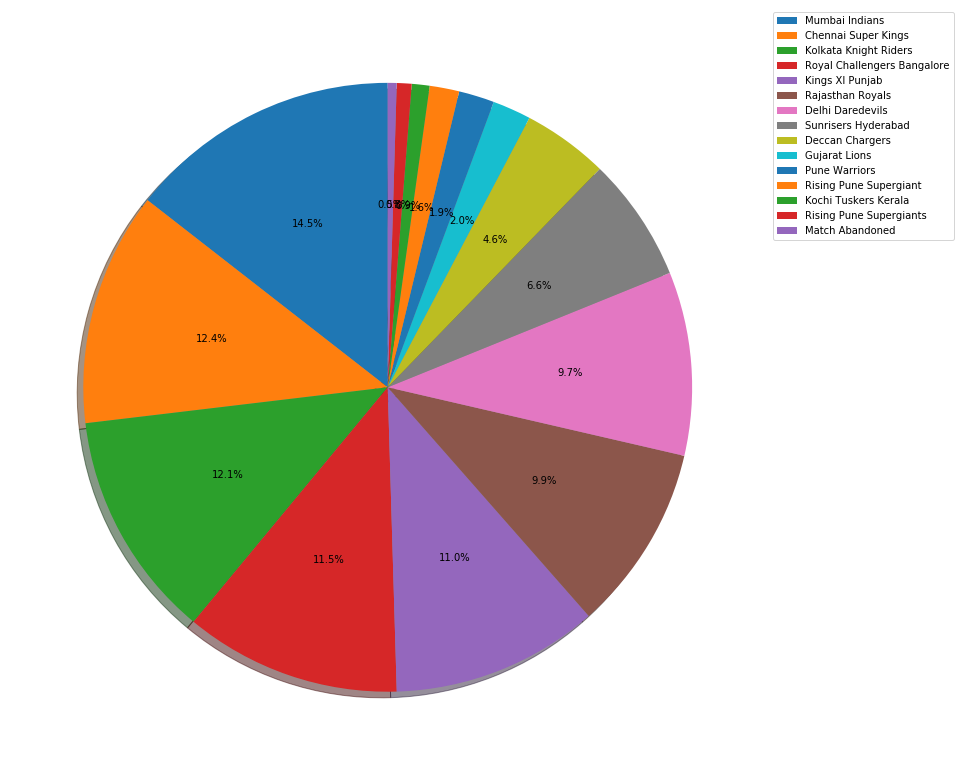

In [74]:
match_winners = df.winner.value_counts()
fig, ax = plt.subplots(figsize=(16,14))
explode = (0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4)
ax.pie(match_winners, labels = None, autopct='%1.1f%%', startangle=90, shadow = True)
ax.legend(bbox_to_anchor=(1,1), labels=match_winners.index)

### What are the total runs scored in each innings in all IPL matches?

In [75]:
ipl.groupby(['inning']).agg({'total_runs': 'sum'})

,total_runs
inning,
1,101547
2,92594
3,96
4,77


### How many balls were bowled in each inning?

In [76]:
ipl.groupby(['inning']).agg({'ball': 'count'})

,ball
inning,
1,78029
2,72350
3,43
4,38


### What is the total number of runs scored against balls bowled in each innings per season in all matches?

In [77]:
ipl.groupby(['season','inning']).agg({'total_runs': 'sum', 'ball': 'count'})

total_runs  ball
season inning                  
2008   1             9336  7065
       2             8601  6424
2009   1             8565  7021
       2             7755  6574
       3               15     7
       4               18     4
2010   1             9887  7491
       2             8977  6998
       3                9     5
       4               10     4
2011   1            11123  8863
       2            10031  8150
2012   1            11658  9096
       2            10795  8671
2013   1            11848  9316
       2            10693  8836
       3               35    13
       4               26    12
2014   1             9784  7374
       2             9125  6914
       3               11     6
       4               11     6
2015   1             9809  7157
       2             8523  6484
       3               15     7
       4                6     4
2016   1             9756  7372
       2             9106  6724
2017   1             9781  7274
       2             8988  6575
       3               11     5
       4                6     8

Text(0, 0.5, 'Season and Innings')

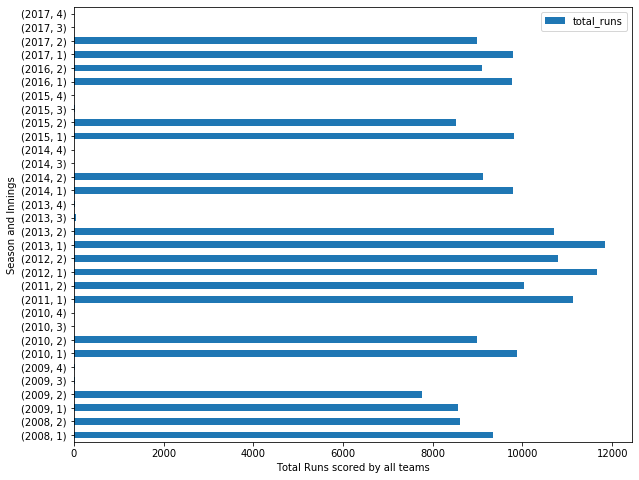

In [78]:
ipl.groupby(['season','inning']).agg({'total_runs': 'sum'}).plot(kind='barh', figsize=(10,8))
plt.xlabel('Total Runs scored by all teams')
plt.ylabel('Season and Innings')

### What is the total runs scored per season

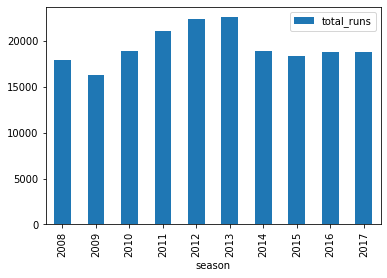

In [79]:
ipl.groupby(['season']).agg({'total_runs': 'sum'}).plot(kind='bar')

In [80]:
y = ipl.groupby(['season']).agg({'total_runs': 'sum', 'ball': 'count'})
x = df.groupby(['season']).agg({'id': 'count'})
x2 = x.reset_index()
y2 = y.reset_index()

In [81]:
iplz = pd.merge(x2,y2, how='inner', on='season')
ipl2=iplz.set_index('season')
ipl2

,id,total_runs,ball
season,,,
2008,58,17937,13489
2009,57,16353,13606
2010,60,18883,14498
2011,73,21154,17013
2012,74,22453,17767
2013,76,22602,18177
2014,60,18931,14300
2015,59,18353,13652
2016,60,18862,14096


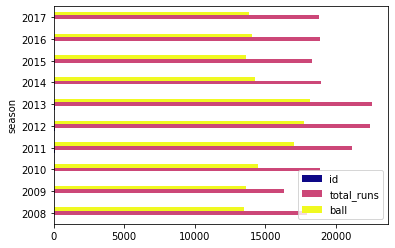

In [82]:
ipl2.plot(kind ='barh', colormap = 'plasma')

### 1) What is the average runs scored per match by season?

### 2) What is the average balls bowled per match by season?

### 3) What is average runs scored against each ball bowled per season?

In [83]:
t = ipl2['total_runs']
b = ipl2['ball']
n = ipl2['id']
tn = (t.T / n.T).T
bn = (b.T / n.T).T
tb = (t.T / b.T).T
z = pd.DataFrame([n, tn,bn,tb])
z.index = ['No.of matches', 'Average Runs per match', 'Average balls bowled per match', 'Average runs per ball']
z.T

,No.of matches,Average Runs per match,Average balls bowled per match,Average runs per ball
season,,,,
2008,58.0,309.258621,232.568966,1.329750
2009,57.0,286.894737,238.701754,1.201896
2010,60.0,314.716667,241.633333,1.302456
2011,73.0,289.780822,233.054795,1.243402
2012,74.0,303.418919,240.094595,1.263747
2013,76.0,297.394737,239.171053,1.243440
2014,60.0,315.516667,238.333333,1.323846
2015,59.0,311.067797,231.389831,1.344345
2016,60.0,314.366667,234.933333,1.338110


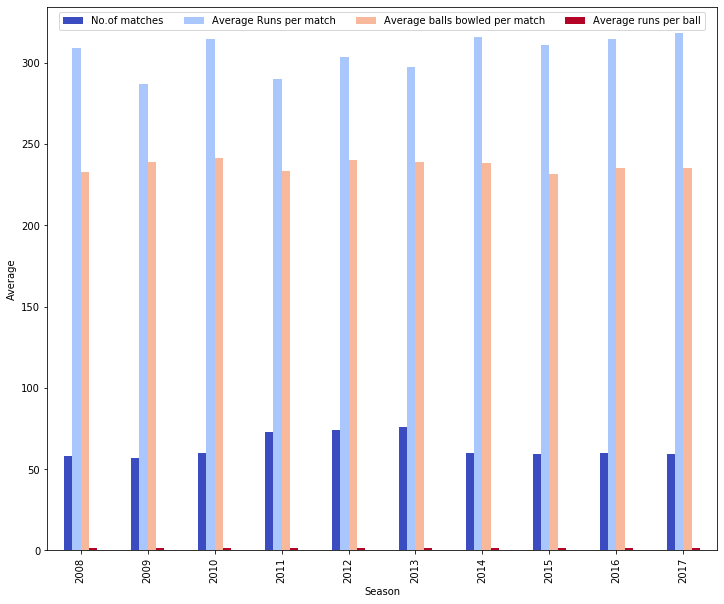

In [84]:
z.T.plot(kind='bar', figsize = (12,10), colormap = 'coolwarm')
plt.xlabel('Season')
plt.ylabel('Average')
plt.legend(loc=9,ncol=4)

### What is Virat Kohli's strike rate in IPL matches over seasons?


C:\Users\KC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


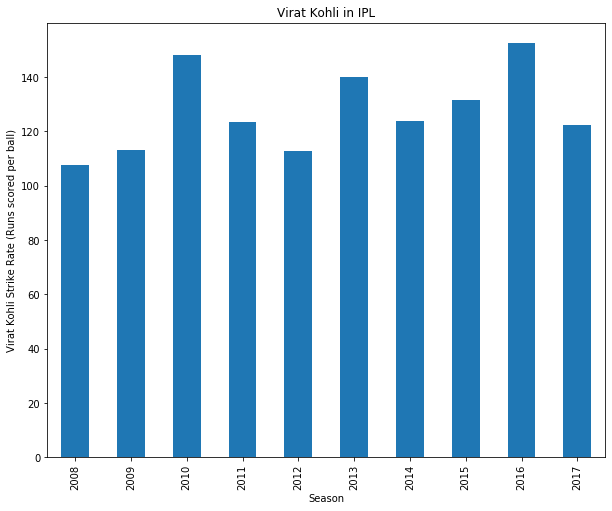

In [85]:
ak = ipl[ipl.batsman.str.lower().str.contains('kohli')].groupby(['season'])['total_runs'].count()
bk = ipl[ipl.batsman.str.lower().str.contains('kohli')].groupby(['season'])['total_runs'].sum()
ck = pd.concat([ak, bk], axis=1)
kohli_strikerate = (bk.T / ak.T*100).T
kohli_strikerate.plot('bar', figsize=(10,8))
plt.xlabel('Season')
plt.ylabel('Virat Kohli Strike Rate (Runs scored per ball)')
plt.title('Virat Kohli in IPL')
plt.show()

Text(0.5, 0, 'Runs')

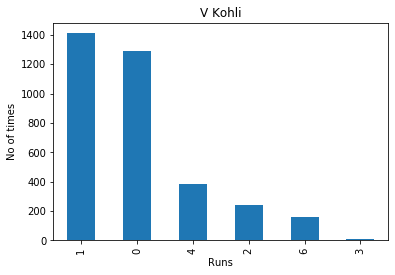

In [86]:
deliveries[deliveries["batsman"] == "V Kohli"]["batsman_runs"].value_counts().plot(kind="bar")
plt.title('V Kohli')
plt.ylabel('No of times')
plt.xlabel('Runs')

### List top 10 batsman who have faced number of balls in IPL?

In [87]:
ipl['batsman'].value_counts()[:10]

V Kohli       3494
G Gambhir     3433
SK Raina      3369
RG Sharma     3274
S Dhawan      3005
RV Uthappa    2960
DA Warner     2902
MS Dhoni      2680
AM Rahane     2602
CH Gayle      2532
Name: batsman, dtype: int64

### Bowler is 'R Ashwin', How many runs were scored of his bowling by opponent teams in IPL

In [88]:
Ash = deliveries[deliveries['bowler'] == 'R Ashwin']  # inning 2
bowler_Ash = Ash.groupby('batting_team')['total_runs'].sum()
bowler_Ash

batting_team
Deccan Chargers                111
Delhi Daredevils               334
Gujarat Lions                   63
Kings XI Punjab                427
Kochi Tuskers Kerala            48
Kolkata Knight Riders          321
Mumbai Indians                 388
Pune Warriors                  149
Rajasthan Royals               225
Royal Challengers Bangalore    340
Sunrisers Hyderabad            146
Name: total_runs, dtype: int64

C:\Users\KC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


Text(0.5, 1.0, 'R Ashwin dismissal kind')

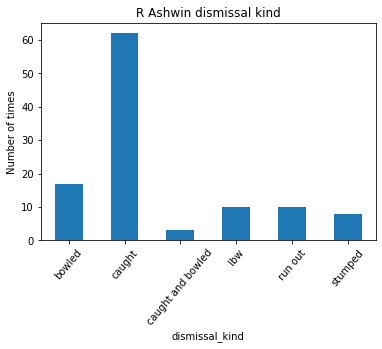

In [89]:
dismissal_Ash = Ash.groupby('dismissal_kind')['player_dismissed'].count()
dismissal_Ash.plot('bar', rot =50)
plt.ylabel('Number of times')
plt.title('R Ashwin dismissal kind')